In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\serda\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\serda\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\serda\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
  stacklevel=1)


# Read Preprocessed Data

In [2]:
data = pd.read_csv(r'Data\preprocessed_data.csv')

In [3]:
x_data = data["text"][pd.isna(data["text"])==False]
y_data = data["target"][pd.isna(data["text"])== False]

In [4]:
x_data

0                           haha you guy are bunch of loser
1                                         ur sh tty comment
2         it ridiculous that these guy are being called ...
3         this story get more ridiculous by the hour and...
4         angry troll misogynist and racist oh my it doe...
5         yet call out all muslim for the act of few wil...
6            this bitch is nut who would read book by woman
7         tuesday jan 13 member of this socalled militia...
8         love that they also participate in the portlan...
9         took this a an opportunity to check back in on...
10        their ridiculous band photo ha me wanting to d...
11        will whiteness history month make all white pe...
12        anybody who can kiss that many ass that quickl...
13        metro ha lied to u from the beginning about wh...
14        on it face glueck claim that ag rosenblum need...
15        um bernie supporter attack thom hartmann liar ...
16                                      

# Bag of Word Model

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

In [6]:
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.95, stop_words=stopwords.words('english'))

In [7]:
X = vectorizer.fit_transform(x_data).toarray() 

In [8]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# Train Test Split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, y_data, test_size=0.2, random_state=32)

In [11]:
np.unique(y_test, return_counts=True)

(array([0, 1], dtype=int64), array([31649, 32198], dtype=int64))

# Shuffle

In [12]:
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train, random_state = 1)

# Neural Network

In [13]:
from keras.layers import Dense,Dropout
from keras.models import Sequential

Using TensorFlow backend.


## Model -1-

In [20]:
model = Sequential()


model.add(Dense(1024,input_dim=(1500) ,activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1024)              1537024   
_________________________________________________________________
dense_8 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_9 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_10 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_11 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 65        
Total params: 2,398,465
Trainable params: 2,398,465
Non-trainable params: 0
____________________________________________

In [22]:
hist = model.fit(x_train, y_train, batch_size=512, epochs=10, validation_split=0.1)

Train on 229847 samples, validate on 25539 samples
Epoch 1/10
229847/229847 [==============================] - 4s 19us/step - loss: 0.4240 - accuracy: 0.8107 - val_loss: 0.3886 - val_accuracy: 0.8310
Epoch 2/10
229847/229847 [==============================] - 4s 18us/step - loss: 0.3521 - accuracy: 0.8477 - val_loss: 0.3934 - val_accuracy: 0.8288
Epoch 3/10
229847/229847 [==============================] - 4s 18us/step - loss: 0.2733 - accuracy: 0.8835 - val_loss: 0.4565 - val_accuracy: 0.8180
Epoch 4/10
229847/229847 [==============================] - 4s 18us/step - loss: 0.1659 - accuracy: 0.9306 - val_loss: 0.6208 - val_accuracy: 0.8030
Epoch 5/10
229847/229847 [==============================] - 4s 18us/step - loss: 0.1074 - accuracy: 0.9555 - val_loss: 0.7553 - val_accuracy: 0.8085
Epoch 6/10
229847/229847 [==============================] - 4s 18us/step - loss: 0.0781 - accuracy: 0.9678 - val_loss: 0.9307 - val_accuracy: 0.8007
Epoch 7/10
229847/229847 [=============================

In [23]:
model.evaluate(x_test, y_test)[1]

63847/63847 [==============================] - 2s 33us/step


0.8013845682144165

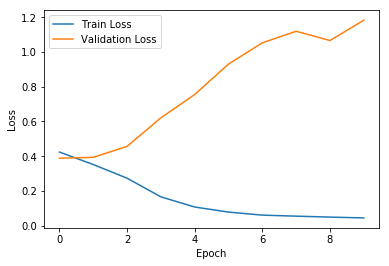

In [27]:
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(hist.history["loss"], label='Train Loss')
plt.plot(hist.history["val_loss"], label='Validation Loss')
plt.legend()

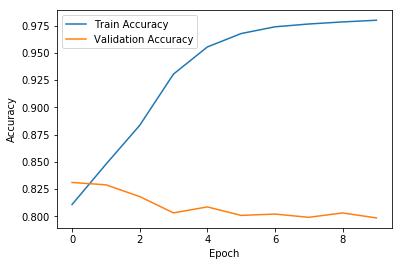

In [28]:
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(hist.history["accuracy"], label='Train Accuracy')
plt.plot(hist.history["val_accuracy"], label='Validation Accuracy')
plt.legend()

## Model -2-

In [29]:
model = Sequential()


model.add(Dense(1024,input_dim=1500 ,activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 1024)              1537024   
_________________________________________________________________
dense_14 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_15 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_16 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_17 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_18 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_19 (Dense)             (None, 1)                

In [31]:
hist = model.fit(x_train, y_train, batch_size=512, epochs=10, validation_split=0.1)

Train on 229847 samples, validate on 25539 samples
Epoch 1/10
229847/229847 [==============================] - 5s 21us/step - loss: 0.4253 - accuracy: 0.8091 - val_loss: 0.3968 - val_accuracy: 0.8260
Epoch 2/10
229847/229847 [==============================] - 5s 20us/step - loss: 0.3531 - accuracy: 0.8468 - val_loss: 0.3959 - val_accuracy: 0.8297
Epoch 3/10
229847/229847 [==============================] - 5s 20us/step - loss: 0.2753 - accuracy: 0.8809 - val_loss: 0.4565 - val_accuracy: 0.8200
Epoch 4/10
229847/229847 [==============================] - 5s 20us/step - loss: 0.1655 - accuracy: 0.9298 - val_loss: 0.6304 - val_accuracy: 0.8068
Epoch 5/10
229847/229847 [==============================] - 5s 20us/step - loss: 0.1060 - accuracy: 0.9562 - val_loss: 0.7681 - val_accuracy: 0.8098
Epoch 6/10
229847/229847 [==============================] - 5s 20us/step - loss: 0.0741 - accuracy: 0.9683 - val_loss: 0.9296 - val_accuracy: 0.7990
Epoch 7/10
229847/229847 [=============================

In [32]:
model.evaluate(x_test, y_test)[1]

63847/63847 [==============================] - 3s 40us/step


0.8000062704086304

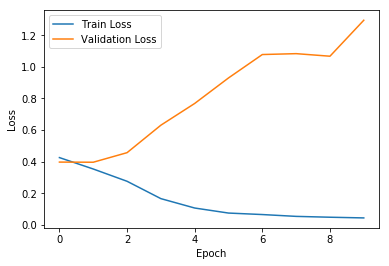

In [33]:
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(hist.history["loss"], label='Train Loss')
plt.plot(hist.history["val_loss"], label='Validation Loss')
plt.legend()

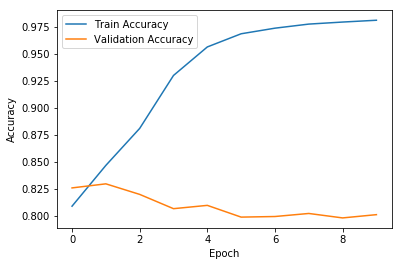

In [34]:
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(hist.history["accuracy"], label='Train Accuracy')
plt.plot(hist.history["val_accuracy"], label='Validation Accuracy')
plt.legend()

## Model -3-

In [41]:
model = Sequential()


model.add(Dense(1024,input_dim=1500 ,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 1024)              1537024   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_28 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_29 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_30 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_31 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_32 (Dense)             (None, 64)               

In [43]:
hist = model.fit(x_train, y_train, batch_size=512, epochs=10, validation_split=0.1)

Train on 229847 samples, validate on 25539 samples
Epoch 1/10
229847/229847 [==============================] - 5s 21us/step - loss: 0.4337 - accuracy: 0.8035 - val_loss: 0.3941 - val_accuracy: 0.8288
Epoch 2/10
229847/229847 [==============================] - 5s 21us/step - loss: 0.3739 - accuracy: 0.8374 - val_loss: 0.3843 - val_accuracy: 0.8318
Epoch 3/10
229847/229847 [==============================] - 5s 21us/step - loss: 0.3407 - accuracy: 0.8518 - val_loss: 0.3926 - val_accuracy: 0.8315
Epoch 4/10
229847/229847 [==============================] - 5s 22us/step - loss: 0.3002 - accuracy: 0.8693 - val_loss: 0.4074 - val_accuracy: 0.8283
Epoch 5/10
229847/229847 [==============================] - 5s 20us/step - loss: 0.2567 - accuracy: 0.8894 - val_loss: 0.4428 - val_accuracy: 0.8274
Epoch 6/10
229847/229847 [==============================] - 5s 21us/step - loss: 0.2216 - accuracy: 0.9055 - val_loss: 0.4428 - val_accuracy: 0.8252
Epoch 7/10
229847/229847 [=============================

In [44]:
model.evaluate(x_test, y_test)[1]

63847/63847 [==============================] - 3s 40us/step


0.8182530403137207

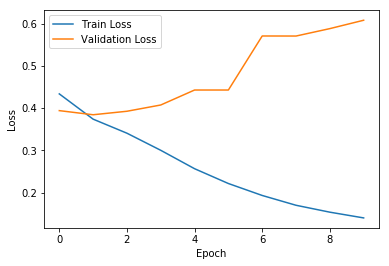

In [45]:
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(hist.history["loss"], label='Train Loss')
plt.plot(hist.history["val_loss"], label='Validation Loss')
plt.legend()

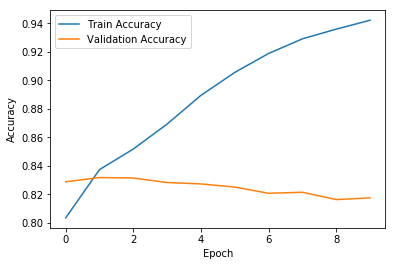

In [46]:
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(hist.history["accuracy"], label='Train Accuracy')
plt.plot(hist.history["val_accuracy"], label='Validation Accuracy')
plt.legend()

## Model -4-

In [47]:
model = Sequential()


model.add(Dense(1024,input_dim=1500 ,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [48]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 1024)              1537024   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_35 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_36 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_37 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 128)              

In [49]:
hist = model.fit(x_train, y_train, batch_size=512, epochs=10, validation_split=0.1)

Train on 229847 samples, validate on 25539 samples
Epoch 1/10
229847/229847 [==============================] - 5s 22us/step - loss: 0.4370 - accuracy: 0.8012 - val_loss: 0.3902 - val_accuracy: 0.8296
Epoch 2/10
229847/229847 [==============================] - 5s 21us/step - loss: 0.3737 - accuracy: 0.8375 - val_loss: 0.3865 - val_accuracy: 0.8324
Epoch 3/10
229847/229847 [==============================] - 5s 21us/step - loss: 0.3408 - accuracy: 0.8519 - val_loss: 0.3934 - val_accuracy: 0.8319
Epoch 4/10
229847/229847 [==============================] - 5s 21us/step - loss: 0.3000 - accuracy: 0.8708 - val_loss: 0.4010 - val_accuracy: 0.8277
Epoch 5/10
229847/229847 [==============================] - 5s 21us/step - loss: 0.2585 - accuracy: 0.8890 - val_loss: 0.4427 - val_accuracy: 0.8259
Epoch 6/10
229847/229847 [==============================] - 5s 21us/step - loss: 0.2213 - accuracy: 0.9058 - val_loss: 0.4869 - val_accuracy: 0.8222
Epoch 7/10
229847/229847 [=============================

In [50]:
model.evaluate(x_test, y_test)[1]

63847/63847 [==============================] - 3s 40us/step


0.8203674554824829

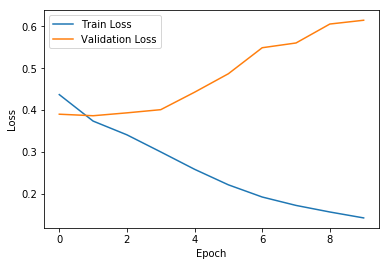

In [51]:
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(hist.history["loss"], label='Train Loss')
plt.plot(hist.history["val_loss"], label='Validation Loss')
plt.legend()

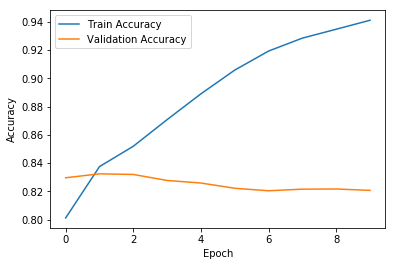

In [52]:
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(hist.history["accuracy"], label='Train Accuracy')
plt.plot(hist.history["val_accuracy"], label='Validation Accuracy')
plt.legend()